# Example: CitiBike data

Adapted from Kelsey Jordahl
https://gist.github.com/kjordahl/5957573

In [2]:
import requests  
import json
from pyproj import Proj
from shapely.geometry import Point
import geopandas as gp 
import matplotlib.pyplot as plt
#from geopandas import getodatabase as gd

NYC borough boundaries downloaded from [Bytes of the Big Apple](http://www.nyc.gov/html/dcp/download/bytes/nybb_13a.zip)

In [3]:
boros = gp.GeoDataFrame.from_file('nybb_15b/nybb.shp')

Load real time bike station data from [CitiBike](http://citibikenyc.com) json API:

In [4]:
# get the bike data and convert it to a ditcionary
endpoint_url = 'http://citibikenyc.com/stations/json'
response = requests.get(endpoint_url)
data = json.loads(response.text)


In [5]:
# convert the relevant part to a geodataframe
df = gp.GeoDataFrame(data['stationBeanList'])
df.head()

,altitude,availableBikes,availableDocks,city,id,landMark,lastCommunicationTime,latitude,location,longitude,postalCode,stAddress1,stAddress2,stationName,statusKey,statusValue,testStation,totalDocks
0,,3,35,,72,,2018-04-10 04:08:58 PM,40.767272,,-73.993929,,W 52 St & 11 Ave,,W 52 St & 11 Ave,1,In Service,False,39
1,,26,4,,79,,2018-04-10 04:09:49 PM,40.719116,,-74.006667,,Franklin St & W Broadway,,Franklin St & W Broadway,1,In Service,False,33
2,,22,4,,82,,2018-04-10 04:09:32 PM,40.711174,,-74.000165,,St James Pl & Pearl St,,St James Pl & Pearl St,1,In Service,False,27
3,,44,15,,83,,2018-04-10 04:08:10 PM,40.683826,,-73.976323,,Atlantic Ave & Fort Greene Pl,,Atlantic Ave & Fort Greene Pl,1,In Service,False,62
4,,6,13,,119,,2018-04-10 04:08:29 PM,40.696089,,-73.978034,,Park Ave & St Edwards St,,Park Ave & St Edwards St,1,In Service,False,19


In [6]:
# there is one row for each bike station.  How many stations are there? 
len(df)

813

In [7]:
# in the file above, there are lon-lats, but no geometry field
# we need to set that up

s = gp.GeoSeries([Point(x, y) for x, y in zip(df['longitude'], df['latitude'])])#add gp infront of geoseries
df['geometry'] = s
df.crs = {'init': 'epsg:4326', 'no_defs': True}
df.geometry.total_bounds

array([-74.0969366 ,  40.65539977, -73.9077436 ,  40.81439444])

In [8]:
# make sure they are on the same CRS.  
# checking the bounds is a nice way of seeing this
df.to_crs(boros.crs, inplace=True)
df.geometry.total_bounds

array([  957370.14732176,   178056.37414829,  1009803.53178432,
         235986.42166716])

In [9]:
# the geometry objects can do lots of cool stuff.  For example: 

manhattan = boros.geometry[3]
in_mn = df.geometry.within(manhattan)
print(sum(in_mn), 'stations in Manhattan')

413 stations in Manhattan


# Your turn

You can read about the range of operations available in geopandas here: 
    
http://geopandas.org/index.html

Your assignment is to: 

1. Calculate how many stations are in each borough
2. Calculate how many bikes are currently available in each borough
3. Read about and try at least two new spatial or geometric operations (beyond what I've covered here). 

In [10]:
# 1 and 2
x = 0
while x < len(boros):
    borough_name = boros.geometry[x]
    in_borough = df.geometry.within(borough_name)
    print(sum(in_borough), 'stations in', boros.BoroName[x])
    print(sum(df['availableBikes'][in_borough]), 'available bikes in', boros.BoroName[x])
    x=x+1

0 stations in Staten Island
0 available bikes in Staten Island
267 stations in Brooklyn
3184 available bikes in Brooklyn
81 stations in Queens
520 available bikes in Queens
413 stations in Manhattan
5545 available bikes in Manhattan
0 stations in Bronx
0 available bikes in Bronx


In [11]:
df.head()

,altitude,availableBikes,availableDocks,city,id,landMark,lastCommunicationTime,latitude,location,longitude,postalCode,stAddress1,stAddress2,stationName,statusKey,statusValue,testStation,totalDocks,geometry
0,,3,35,,72,,2018-04-10 04:08:58 PM,40.767272,,-73.993929,,W 52 St & 11 Ave,,W 52 St & 11 Ave,1,In Service,False,39,POINT (985931.706502895 218814.7571059909)
1,,26,4,,79,,2018-04-10 04:09:49 PM,40.719116,,-74.006667,,Franklin St & W Broadway,,Franklin St & W Broadway,1,In Service,False,33,POINT (982402.0068864136 201269.770346975)
2,,22,4,,82,,2018-04-10 04:09:32 PM,40.711174,,-74.000165,,St James Pl & Pearl St,,St James Pl & Pearl St,1,In Service,False,27,POINT (984204.131576321 198376.4207269395)
3,,44,15,,83,,2018-04-10 04:08:10 PM,40.683826,,-73.976323,,Atlantic Ave & Fort Greene Pl,,Atlantic Ave & Fort Greene Pl,1,In Service,False,62,POINT (990816.693171227 188413.5778061197)
4,,6,13,,119,,2018-04-10 04:08:29 PM,40.696089,,-73.978034,,Park Ave & St Edwards St,,Park Ave & St Edwards St,1,In Service,False,19,POINT (990341.0662772973 192881.3587593974)


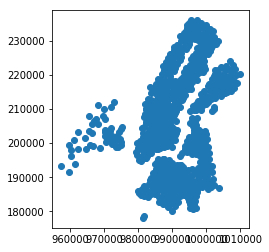

In [12]:
df.plot()
plt.show()

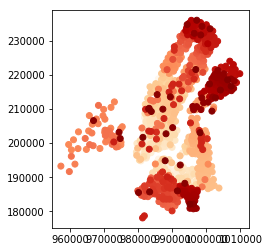

In [13]:
df.plot(cmap='OrRd', scheme='quantiles')
plt.show()

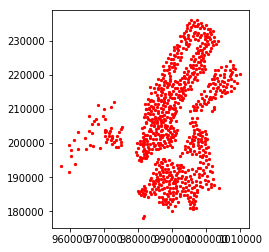

In [14]:
df.plot(marker='o', color='red', markersize=5)
plt.show()